In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv('ner_dataset.csv', encoding='latin1')

In [3]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
print("데이터프레임 행의 개수 : {}".format(len(data)))

데이터프레임 행의 개수 : 1048575


In [5]:
print("데이터에 Null 값이 있는지 유무 : " +str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : True


In [6]:
data_test = pd.DataFrame({"A":[1, 2, np.nan],
                          "B":[3, np.nan, 4]})
data_test.isnull()

,A,B
0,False,False
1,False,True
2,True,False


In [8]:
data_test.isnull().values

array([[False, False],
       [False,  True],
       [ True, False]])

In [10]:
data_test.isnull().values.any()

True

In [11]:
print('어떤 열에 Null 값이 있는지 출력')
print('================================')
data.isnull().sum()

어떤 열에 Null 값이 있는지 출력


Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [13]:
print('sentence # 열의 중복을 제거한 값의 개수 : {}'.format(data['Sentence #'].nunique()))
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))
print('Tag 열의 중복을 제거한 값의 개수 : {}'.format(data.Tag.nunique()))

sentence # 열의 중복을 제거한 값의 개수 : 47959
Word 열의 중복을 제거한 값의 개수 : 35178
Tag 열의 중복을 제거한 값의 개수 : 17


In [14]:
print('Tag 열의 각각의 값의 개수 카운트')
print('===================================')
print(data.groupby('Tag').size().reset_index(name='count'))

Tag 열의 각각의 값의 개수 카운트
      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


In [15]:
data = data.fillna(method='ffill')
print(data.tail())

              Sentence #       Word  POS Tag
1048570  Sentence: 47959       they  PRP   O
1048571  Sentence: 47959  responded  VBD   O
1048572  Sentence: 47959         to   TO   O
1048573  Sentence: 47959        the   DT   O
1048574  Sentence: 47959     attack   NN   O


In [16]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : False


In [17]:
data['Word'] = data['Word'].str.lower()
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))

Word 열의 중복을 제거한 값의 개수 : 31817


In [18]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [19]:
func = lambda temp: [(w, t) for w, t in zip(temp['Word'].values.tolist(),
                                            temp['Tag'].values.tolist())]
tagged_sentences = [t for t in data.groupby('Sentence #').apply(func)]
print('전체 샘플 개수 : {}'.format(len(tagged_sentences)))

전체 샘플 개수 : 47959


In [20]:
tagged_sentences[0]

[('thousands', 'O'),
 ('of', 'O'),
 ('demonstrators', 'O'),
 ('have', 'O'),
 ('marched', 'O'),
 ('through', 'O'),
 ('london', 'B-geo'),
 ('to', 'O'),
 ('protest', 'O'),
 ('the', 'O'),
 ('war', 'O'),
 ('in', 'O'),
 ('iraq', 'B-geo'),
 ('and', 'O'),
 ('demand', 'O'),
 ('the', 'O'),
 ('withdrawal', 'O'),
 ('of', 'O'),
 ('british', 'B-gpe'),
 ('troops', 'O'),
 ('from', 'O'),
 ('that', 'O'),
 ('country', 'O'),
 ('.', 'O')]

In [21]:
sentences, ner_tags = [], []
for tagged_sentence in tagged_sentences:
  sentence, tag_info = zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(tag_info))

In [23]:
print('문장 토큰 개수 : {}'.format(len(sentences[125])))
print('문장 토큰')
print(sentences[125])
print('태깅 토큰 개수 : {}'.format(len(ner_tags[125])))
print('태킹 토큰')
print(ner_tags[125])

문장 토큰 개수 : 25
문장 토큰
['health', 'experts', 'predicted', 'the', 'number', 'of', 'people', 'who', 'die', 'from', 'cancer', 'will', 'soon', 'be', 'greater', 'than', 'deaths', 'from', 'aids', ',', 'tuberculosis', 'and', 'malaria', 'combined', '.']
태깅 토큰 개수 : 25
태킹 토큰
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-nat', 'O', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이 : 104
샘플의 평균 길이 : 21.863988


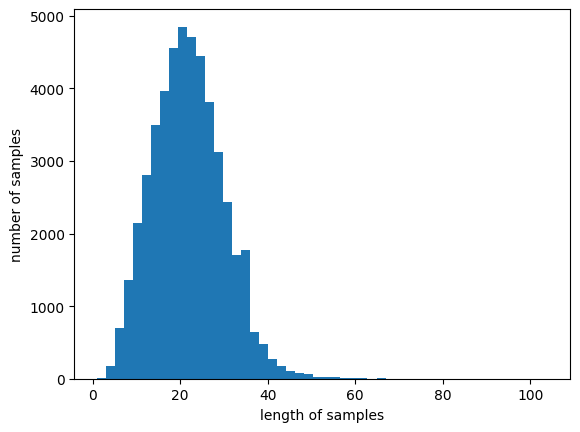

In [24]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences)) / len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [26]:
src_tokenizer = Tokenizer(oov_token='OOV')
tar_tokenizer = Tokenizer(lower=False)

src_tokenizer.fit_on_texts(sentences)
tar_tokenizer.fit_on_texts(ner_tags)

In [27]:
vocab_size = len(src_tokenizer.word_index)+1
tag_size = len(tar_tokenizer.word_index)+1
print('단어 집합의 크기 {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 31819
개체명 태깅 정보 집합의 크기 : 18


In [39]:
src_tokenizer.word_index

{'OOV': 1,
 'the': 2,
 '.': 3,
 ',': 4,
 'in': 5,
 'of': 6,
 'to': 7,
 'a': 8,
 'and': 9,
 "'s": 10,
 'for': 11,
 'has': 12,
 'on': 13,
 'is': 14,
 'that': 15,
 'have': 16,
 'with': 17,
 'said': 18,
 'was': 19,
 'at': 20,
 'says': 21,
 'from': 22,
 'by': 23,
 'he': 24,
 'an': 25,
 'as': 26,
 'say': 27,
 'u.s.': 28,
 'it': 29,
 'are': 30,
 '"': 31,
 'were': 32,
 'his': 33,
 'will': 34,
 'president': 35,
 'officials': 36,
 'government': 37,
 'mr.': 38,
 'been': 39,
 'killed': 40,
 'two': 41,
 'people': 42,
 'after': 43,
 'not': 44,
 'its': 45,
 'be': 46,
 'but': 47,
 'they': 48,
 'more': 49,
 'also': 50,
 'new': 51,
 'united': 52,
 'military': 53,
 'who': 54,
 'last': 55,
 'country': 56,
 'than': 57,
 'minister': 58,
 'police': 59,
 'their': 60,
 'iraq': 61,
 'one': 62,
 'which': 63,
 'security': 64,
 'this': 65,
 'about': 66,
 'year': 67,
 'other': 68,
 'had': 69,
 'states': 70,
 'least': 71,
 'tuesday': 72,
 'since': 73,
 'forces': 74,
 'world': 75,
 'thursday': 76,
 'week': 77,
 'grou

In [28]:
tar_tokenizer.word_index

{'O': 1,
 'B-geo': 2,
 'B-tim': 3,
 'B-org': 4,
 'I-per': 5,
 'B-per': 6,
 'I-org': 7,
 'B-gpe': 8,
 'I-geo': 9,
 'I-tim': 10,
 'B-art': 11,
 'B-eve': 12,
 'I-art': 13,
 'I-eve': 14,
 'B-nat': 15,
 'I-gpe': 16,
 'I-nat': 17}

In [29]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [30]:
x_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [31]:
print(x_data[0])
print(y_data[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [32]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0]='PAD'

print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [33]:
decoded = []
for index in x_data[0]:
  decoded.append(index_to_word[index])

print('기존의 문장 : {}'.format(sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
디코딩 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [34]:
max_len = 70
x_data = pad_sequences(x_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [37]:
x_data[0]

array([ 254,    6,  967,   16, 1795,  238,  468,    7,  523,    2,  129,
          5,   61,    9,  571,    2,  833,    6,  186,   90,   22,   15,
         56,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

In [38]:
y_data[0]

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [35]:
x_train, x_test, y_train_int, y_test_int = train_test_split(x_data, y_data, test_size=0.2)

In [36]:
y_train = to_categorical(y_train_int, num_classes=tag_size)
y_test = to_categorical(y_test_int, num_classes=tag_size)

In [40]:
print('훈련 샘플 문장의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_train_int.shape))
print('훈련 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_test_int.shape))
print('태스트 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (38367, 70)
훈련 샘플 레이블(정수 인코딩)의 크기 : (38367, 70)
훈련 샘플 레이블(원-핫 인코딩)의 크기 : (38367, 70, 18)
테스트 샘플 문장의 크기 : (9592, 70)
테스트 샘플 레이블(정수 인코딩)의 크기 : (9592, 70)
태스트 샘플 레이블(원-핫 인코딩)의 크기 : (9592, 70, 18)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=6, validation_split=0.1)

Epoch 1/6
270/270 [==============================] - 48s 130ms/step - loss: 0.5509 - accuracy: 0.8772 - val_loss: 0.2462 - val_accuracy: 0.9331
Epoch 2/6
270/270 [==============================] - 11s 41ms/step - loss: 0.1718 - accuracy: 0.9505 - val_loss: 0.1536 - val_accuracy: 0.9553
Epoch 3/6
270/270 [==============================] - 8s 29ms/step - loss: 0.1164 - accuracy: 0.9651 - val_loss: 0.1370 - val_accuracy: 0.9587
Epoch 4/6
270/270 [==============================] - 7s 25ms/step - loss: 0.0937 - accuracy: 0.9711 - val_loss: 0.1346 - val_accuracy: 0.9605
Epoch 5/6
270/270 [==============================] - 5s 20ms/step - loss: 0.0802 - accuracy: 0.9747 - val_loss: 0.1408 - val_accuracy: 0.9599
Epoch 6/6
270/270 [==============================] - 6s 24ms/step - loss: 0.0702 - accuracy: 0.9775 - val_loss: 0.1387 - val_accuracy: 0.9609


In [55]:
i = 27
y_predicted = model.predict(np.array([x_test[i]]))
y_predicted

1/1 [==============================] - 0s 23ms/step


array([[[1.5420227e-08, 9.9993253e-01, 1.0560876e-06, ...,
         3.1194454e-06, 1.1739030e-07, 1.0391931e-06],
        [2.6333726e-08, 9.9961674e-01, 9.8519286e-06, ...,
         1.9163339e-05, 8.2396745e-08, 1.7929070e-06],
        [4.9059702e-07, 9.1069657e-01, 9.7990312e-05, ...,
         2.9869701e-04, 2.4282851e-06, 4.5486453e-05],
        ...,
        [5.5285100e-02, 5.8015272e-02, 5.6879725e-02, ...,
         5.5354409e-02, 5.5393726e-02, 5.5500820e-02],
        [5.5285100e-02, 5.8015272e-02, 5.6879725e-02, ...,
         5.5354409e-02, 5.5393726e-02, 5.5500820e-02],
        [5.5285100e-02, 5.8015272e-02, 5.6879725e-02, ...,
         5.5354409e-02, 5.5393726e-02, 5.5500820e-02]]], dtype=float32)

In [56]:
y_predicted = np.argmax(y_predicted, axis=-1)
y_predicted

array([[1, 1, 1, 3, 1, 1, 1, 1, 1, 6, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]])

In [57]:
labels = np.argmax(y_test[i], -1)
labels

array([ 1,  1,  3, 10,  1,  1,  1,  1,  1,  6,  5,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 12,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0])

In [60]:
# 숫자 다른 거 입력하면 어떻게 나올지 궁금해서
lables_00 = np.argmax(y_test[i], 0)
lables_00

array([37,  0,  0,  2,  0, 10,  9,  0,  0,  0,  3,  0, 21,  0,  0,  0,  0,
        0])

In [62]:
lables_01 = np.argmax(y_test[i], 1)
lables_01

array([ 1,  1,  3, 10,  1,  1,  1,  1,  1,  6,  5,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 12,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0])

In [63]:
labels_02 = np.argmax(y_test[i], 2)
labels_02

AxisError: ignored

In [64]:
print("{:15}|{:5}|{}".format("단어","실제값","예측값"))
print(35*'-')

for word, tag, pred in zip(x_test[i], labels, y_predicted[0]):
  if word != 0:
    print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
in               : O       O
his              : O       O
weekly           : B-tim   O
saturday         : I-tim   B-tim
radio            : O       O
and              : O       O
internet         : O       O
address          : O       O
,                : O       O
mr.              : B-per   B-per
obama            : I-per   I-per
also             : O       O
reached          : O       O
out              : O       O
to               : O       O
jewish           : O       O
communities      : O       O
,                : O       O
whose            : O       O
celebration      : O       O
of               : O       O
passover         : B-eve   O
ends             : O       O
next             : O       O
week             : O       O
,                : O       O
and              : O       O
to               : O       O
people           : O       O
of               : O       O
other            : O       O
faiths           : O       

In [65]:
y_predicted[0]

array([1, 1, 1, 3, 1, 1, 1, 1, 1, 6, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [66]:
y_predicted[1]

IndexError: ignored

In [67]:
y_predicted[-1]

array([1, 1, 1, 3, 1, 1, 1, 1, 1, 6, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [68]:
y_predicted.shape

(1, 70)

In [69]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16165 sha256=e767ae5180b570cb0a75abd6d5d46d1848753a7639c0d3aa457175b598bc3a0f
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [70]:
from seqeval.metrics import f1_score, classification_report

def sequences_to_tag(sequences):
  result = []
  for sequence in sequences:
    word_sequence = []
    for pred in sequence:
      pred_index = np.argmax(pred)
      word_sequence.append(index_to_ner[pred_index].replace("PAD", "O"))
    result.append(word_sequence)
  return result

y_predicted = model.predict([x_test])
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

300/300 [==============================] - 4s 4ms/step
F1-score: 78.1%
              precision    recall  f1-score   support

         art       0.17      0.07      0.10        85
         eve       0.52      0.32      0.40        72
         geo       0.82      0.84      0.83      7548
         gpe       0.97      0.92      0.95      3165
         nat       0.26      0.21      0.24        42
         org       0.59      0.57      0.58      4059
         per       0.70      0.70      0.70      3420
         tim       0.84      0.84      0.84      4164

   micro avg       0.78      0.78      0.78     22555
   macro avg       0.61      0.56      0.58     22555
weighted avg       0.78      0.78      0.78     22555



[노션 정리](https://www.notion.so/BiLSTM-Named-Entity-Recognition-NER-0c5bac267d1d4fa6a9a73d1712044a27#ca7454daed0a4abd9838c8627f8163cc)